<a href="https://colab.research.google.com/github/CatAIGeek/neural-network-challenge-2/blob/main/Copy_of_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Determine the number of unique values in each column.
attrition_df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4


In [3]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition', 'Department']]
y_df.head()



,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


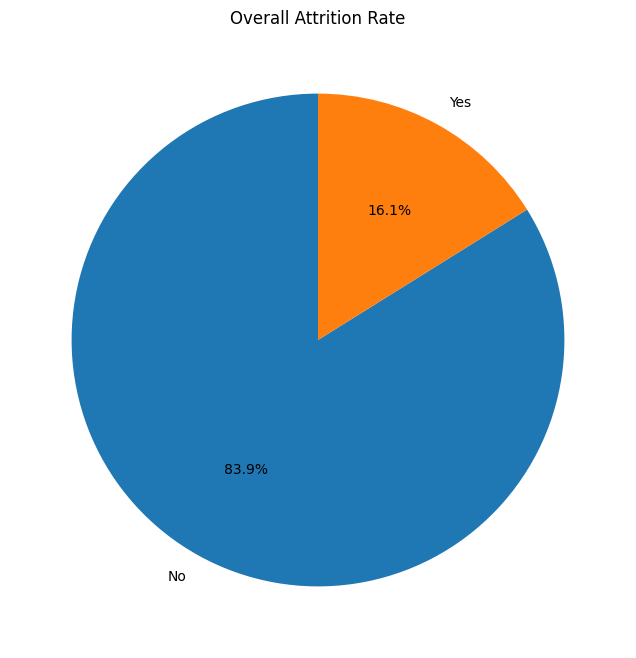

In [4]:
# @title Overall Attrition Rate

import matplotlib.pyplot as plt

# Count the number of employees who left and stayed
attrition_counts = y_df['Attrition'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Overall Attrition Rate')

In [5]:
# prompt: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

# Generate our categorical variable lists
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()


,0
Attrition,2
BusinessTravel,3
Department,3
EducationField,6
JobRole,9
MaritalStatus,3
OverTime,2


In [6]:
# Create a list of at least 10 column names to use as X data
selected_columns = ['Age', 'DistanceFromHome', 'HourlyRate', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create X_df using your selected columns
X_df = attrition_df[selected_columns]

# Display the sample data
X_df.head()

# Show the data types for X_df
X_df.dtypes


,0
Age,int64
DistanceFromHome,int64
HourlyRate,int64
JobSatisfaction,int64
NumCompaniesWorked,int64
PercentSalaryHike,int64
RelationshipSatisfaction,int64
TotalWorkingYears,int64
TrainingTimesLastYear,int64
WorkLifeBalance,int64


In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


In [8]:
# Convert your X data to numeric data types however you see fit
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Add new code cells as necessary





In [9]:
# Create a StandardScaler
scaler = StandardScaler()


# Fit the StandardScaler to the training data
X_scaler = scaler.fit(X_train)


# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [10]:
# Create a OneHotEncoder for the Department column
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()


# Fit the encoder to the training data
encoder.fit(y_train)


# Create two new variables by applying the encoder
# to the training and testing data
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)





In [11]:
# Create a OneHotEncoder for the Attrition column
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()



# Fit the encoder to the training data
encoder.fit(y_train)


# Create two new variables by applying the encoder
# to the training and testing data
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)



## Create, Compile, and Train the Model

In [12]:
# Find the number of columns in the X training data
num_columns = X_train_scaled.shape[1]


# Create the input layer
input_layer = layers.Input(shape=(num_columns,))

# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu')(shared_layer1)



In [13]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
hidden_layer = layers.Dense(32, activation='relu')(shared_layer2)

# Create the output layer
output_layer = layers.Dense(1, activation='sigmoid')(hidden_layer)



In [14]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
hidden_layer = layers.Dense(32, activation='relu')(shared_layer2)


# Create the output layer
output_layer = layers.Dense(1, activation='sigmoid')(hidden_layer)



In [15]:
# Create the model

# Assuming 'output_layer' from ipython-input-18 is for 'Department'
output_layer1 = output_layer
# Assuming 'output_layer' from ipython-input-19 is for 'Attrition'
output_layer2 = output_layer
model = Model(inputs=input_layer, outputs=[output_layer1, output_layer2])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Summarize the model
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import tensorflow as tf


# Extract values and dense shape from csr_matrix
y_train_values = y_train_encoded.data
y_train_indices = np.vstack((y_train_encoded.nonzero().nonzero()[0], y_train_encoded.nonzero()[1]))
y_train_dense_shape = y_train_encoded.shape
y_test_values = y_test_encoded.data
y_test_indices = np.vstack((y_test_encoded.nonzero()[0], y_test_encoded.nonzero()[1])).T  # Use nonzero() to get indices
y_test_dense_shape = y_test_encoded.shape


# Convert csr_matrix to SparseTensor
y_train_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(y_train_indices, y_train_values, y_train_dense_shape))
y_test_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(y_test_indices, y_test_values, y_test_dense_shape))

# Train the model
model.fit(X_train_scaled, [y_train_sparse, y_train_sparse], epochs=10, batch_size=32)

# Convert csr_matrix to SparseTensor
y_train_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(y_train_encoded))
y_test_sparse = tf.sparse.reorder(tf.sparse.SparseTensor(y_test_encoded))




AttributeError: 'tuple' object has no attribute 'nonzero'

In [27]:
# Evaluate the model with the testing
model_loss, model_accuracy = model.evaluate(X_test_scaled, [y_test_sparse, y_test_sparse], verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



NameError: name 'y_test_sparse' is not defined

In [ ]:
# Print the accuracy for both department and attrition


Department predictions accuracy: 0.5271739363670349
Attrition predictions accuracy: 0.8260869383811951


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1.
2.
3.